# IMPORT MODULES

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# LOADING THE DATA SET & EXPLORATORY DATA ANALYSIS

In [41]:
df= pd.read_csv("Loan Prediction Dataset.csv")
#checking first 5 rows of the data set
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
#checking satistical description of the Data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
#data info check. includes entry count, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset


In [44]:
#determining total number of missing values within individual column in the data set
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
cat_variable=list(df.select_dtypes(exclude=np.number).columns)

In [46]:
cat_variable

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [47]:
#data classification.
#classifying the columns into numeric and categorical.

In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
cat_va=df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [50]:
cat_va['Gender'].isnull().sum()

13

In [51]:
num_variable=list(df.select_dtypes(exclude=object).columns)

In [52]:
nums=df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']]

In [53]:
nums['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [54]:
num_variable

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# data exploration and analysis

In [55]:
#droping the loan_ID column as it is not an important feature in our analysis
df.drop('Loan_ID', axis=1, inplace=True)

In [56]:
#value counts of the gender,married,dependents (e.t.c) columns,using a 'for loop' to further gain insights in to our data set
for x in cat_va:
    print(cat_va[x].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [57]:

num_variable

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

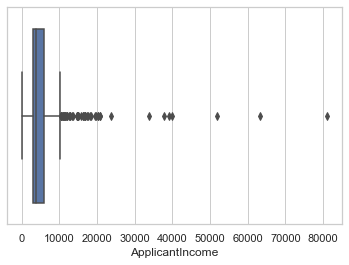

In [58]:
#using the box plot to identify outliers
import seaborn as sns 
sns.set_theme(style='whitegrid')
ax=sns.boxplot(x=df['ApplicantIncome'])

In [59]:
# checking for outliers

In [60]:
o=df[df['ApplicantIncome']> 10000]

In [61]:
o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 9 to 604
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             49 non-null     object 
 1   Married            51 non-null     object 
 2   Dependents         50 non-null     object 
 3   Education          52 non-null     object 
 4   Self_Employed      50 non-null     object 
 5   ApplicantIncome    52 non-null     int64  
 6   CoapplicantIncome  52 non-null     float64
 7   LoanAmount         49 non-null     float64
 8   Loan_Amount_Term   52 non-null     float64
 9   Credit_History     49 non-null     float64
 10  Property_Area      52 non-null     object 
 11  Loan_Status        52 non-null     object 
dtypes: float64(4), int64(1), object(7)
memory usage: 5.3+ KB


In [62]:
m=df[df['ApplicantIncome']< 10000]

In [63]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             549 non-null    object 
 1   Married            557 non-null    object 
 2   Dependents         546 non-null    object 
 3   Education          559 non-null    object 
 4   Self_Employed      529 non-null    object 
 5   ApplicantIncome    559 non-null    int64  
 6   CoapplicantIncome  559 non-null    float64
 7   LoanAmount         540 non-null    float64
 8   Loan_Amount_Term   545 non-null    float64
 9   Credit_History     512 non-null    float64
 10  Property_Area      559 non-null    object 
 11  Loan_Status        559 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.8+ KB


In [64]:
# fill the missing values for numerical terms - median
df['ApplicantIncome']=df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

In [65]:
df['ApplicantIncome'].isnull().sum()

0

In [66]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [67]:
nums.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [68]:
# fill the missing values for numerical terms - median
for x in nums:
    nums[x].fillna(nums.median)

In [69]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [70]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [71]:
for x in nums:
    df[x].fillna(nums[x].median,inplace= True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [73]:
# fill the missing values for categorical terms - mode

In [74]:
for x in cat_va:
    df[x].fillna(cat_va[x].mode()[0],inplace= True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


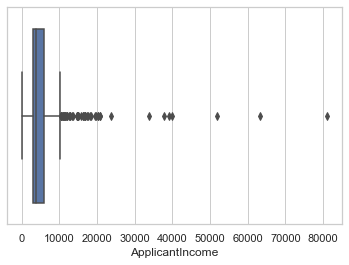

In [77]:
import seaborn as sns 
sns.set_theme(style='whitegrid')
ax=sns.boxplot(x=df['ApplicantIncome'])

In [78]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Label Encoding

In [79]:
from sklearn import preprocessing
enc= preprocessing.LabelEncoder()

In [80]:
#converting categorical variables into 1 and 0
for x in cat_va:
    df[x]=enc.fit_transform(df[x])

In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [82]:
#defining features and target
Y=df['Loan_Status']
X=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [84]:
from sklearn.model_selection import train_test_split

# Train-Test Split

In [85]:
#splitting data set into input and output attributes
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=0)

# Model Training

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
RR= RandomForestClassifier()

In [88]:
RR.fit(X_train,Y_train)

RandomForestClassifier()

In [89]:
y_pred=RR.predict(X_test)

In [90]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
err=confusion_matrix(Y_test,y_pred)

In [93]:
err

array([[ 21,  22],
       [  8, 103]], dtype=int64)

## calculating f1 score 

In [94]:
from sklearn.metrics import f1_score

In [95]:
f1=f1_score(Y_test, y_pred)

In [96]:
f1

0.8728813559322033

# Improving output 
Using feature engineering and other algorithm on the data set, our ouput and model can be improved on

In [97]:
#improving with cross validation

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
cross_v=cross_val_score(RR,X,Y, cv=5)

In [100]:
cross_v

array([0.78861789, 0.74796748, 0.77235772, 0.81300813, 0.79508197])

In [101]:
mean_err=np.mean(cross_v)

# improving with feature engineering
understanding the correlation and relationship between each data entry will further improve outputs and model by recognising entries or column, that are of least importance, and will further boost result if dropped

In [102]:
corrmat=df.corr()
import matplotlib.pyplot as plt
import seaborn as sns

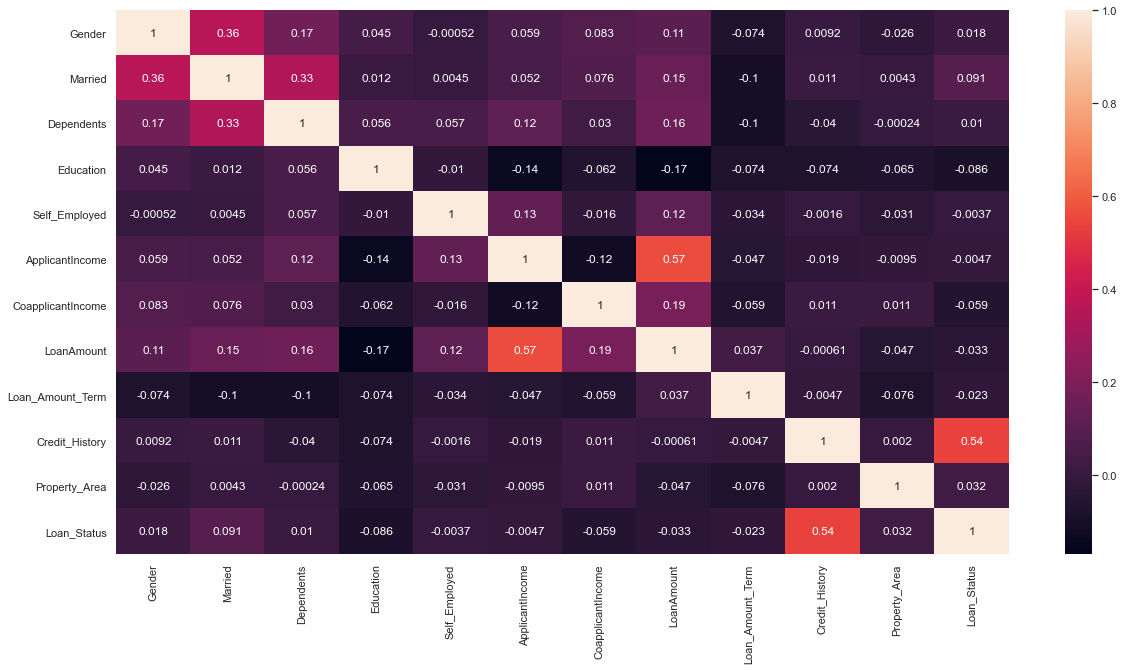

In [103]:
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [104]:
df1=df.copy()

In [105]:
df1.drop('Gender',axis=1,inplace=True)

In [106]:
df1.drop('Education',axis=1,inplace=True)

In [107]:
df1.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [108]:
X2=df1[['Married','Dependents','Self_Employed','ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]

In [109]:
Y2=df1['Loan_Status']

In [110]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2, random_state=0)

In [111]:
RR2= RandomForestClassifier()

In [112]:
RR2.fit(X2_train,Y2_train)

RandomForestClassifier()

In [113]:
y_pred2= RR2.predict(X2_test)

In [114]:
conf_err2=confusion_matrix(Y2_test,y_pred2)

In [115]:
conf_err2

array([[ 21,  22],
       [  7, 104]], dtype=int64)

In [116]:
#variable name 'conf_err2' shows an improved out put. false positive remain the same, while false negative reduced to 7

In [117]:
f2=f1_score(Y2_test,y_pred2)

In [118]:
f2

0.8776371308016877

In [119]:
#feat engineering 3

In [120]:
X3=df1[['Married','Dependents','ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]

In [121]:
Y3=df1['Loan_Status']

In [122]:
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3, random_state=0)
RR3= RandomForestClassifier()
RR3.fit(X3_train,Y3_train)
y_pred3= RR3.predict(X3_test)
conf_err3=confusion_matrix(Y3_test,y_pred3)
conf_err3

array([[ 21,  22],
       [ 10, 101]], dtype=int64)

In [123]:
f3=f1_score(Y3_test,y_pred3)

In [124]:
f3

0.8632478632478633

In [125]:
#feat eng 4
#dropping co applicant income feature

In [146]:
X4=df1[['Married','Dependents','ApplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]
Y4=df1['Loan_Status']
X4_train,X4_test,Y4_train,Y4_test=train_test_split(X4,Y4, random_state=0)
RR4= RandomForestClassifier()
RR4.fit(X4_train,Y4_train)
y_pred4= RR4.predict(X4_test)
conf_err4=confusion_matrix(Y4_test,y_pred4)
print(conf_err4)
f4=f1_score(Y4_test,y_pred4)
f4

[[ 21  22]
 [  9 102]]


0.8680851063829788

In [127]:
#feat eng 5
df1['app_inc']=df1['ApplicantIncome'] + df1['CoapplicantIncome']

In [128]:
X5=df1[['Married','Dependents','app_inc','LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area']]
Y5=df1['Loan_Status']
X5_train,X5_test,Y5_train,Y5_test=train_test_split(X5,Y5, random_state=0)
RR5= RandomForestClassifier()
RR5.fit(X5_train,Y5_train)
y_pred5= RR5.predict(X5_test)
conf_err5=confusion_matrix(Y5_test,y_pred5)
print(conf_err5)
f5=f1_score(Y5_test,y_pred5)
f5

[[ 21  22]
 [ 11 100]]


0.8583690987124463

#Trying other Algorithms

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
EC=ExtraTreesClassifier()

In [131]:
EC.fit(X_train,Y_train)

ExtraTreesClassifier()

In [132]:
y2_pred= EC.predict(X_test)

In [133]:
err2=confusion_matrix(Y_test,y2_pred)

In [134]:
err2

array([[ 20,  23],
       [ 11, 100]], dtype=int64)

In [135]:
from sklearn import tree

In [136]:
TR= tree.DecisionTreeClassifier()

In [137]:
TR.fit(X_train, Y_train)

DecisionTreeClassifier()

In [138]:
y3_pred= TR.predict(X_test)

In [139]:
err3=confusion_matrix(Y_test,y3_pred)

In [140]:
err3

array([[26, 17],
       [22, 89]], dtype=int64)

<AxesSubplot:>

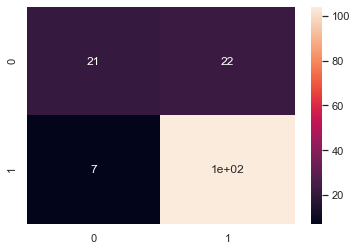

In [147]:
# Conclusion
sns.heatmap(conf_err2, annot=True)